In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [98]:
df_raw = pd.read_csv("DIABETES.csv")

In [99]:
df_raw.head(5)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [100]:
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace = False)

In [101]:
df_raw_x = df_raw.drop(["GENDER"], axis = 1, inplace = False)

In [102]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 2)

print ("Train data X size\t: {}".format(df_train_x.shape))
print ("Train data Y size\t: {}".format(df_train_y.shape))
print ("Test data X size\t: {}".format(df_test_x.shape))
print ("Test data Y size\t: {}\n".format(df_test_y.shape))

gb_uncustomized = GradientBoostingRegressor(random_state = 350)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(gb_uncustomized.score(df_test_x, df_test_y)))

Train data X size	: (309, 10)
Train data Y size	: (309,)
Test data X size	: (133, 10)
Test data Y size	: (133,)

Score on training set:	1.000
Score on test set:	1.000


In [103]:
train_score = []; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range (1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.872,0.866
1,20,0.983,0.980
2,30,0.998,0.996
3,40,1.000,0.999
4,50,1.000,0.999
5,60,1.000,0.999
6,70,1.000,1.000
7,80,1.000,1.000
8,90,1.000,1.000
9,100,1.000,1.000


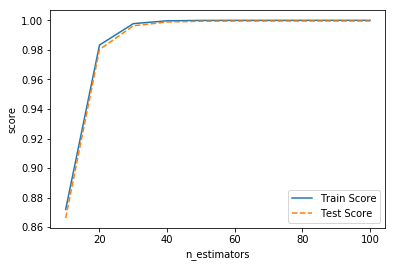

In [104]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [105]:
train_score = []; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = v_min_samples_leaf, 
                                   random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,1.000
1,2,1.000,0.999
2,3,1.000,0.999
3,4,1.000,0.999
4,5,1.000,0.999
5,6,1.000,0.999
6,7,1.000,0.998
7,8,1.000,0.998
8,9,1.000,0.998
9,10,1.000,0.998


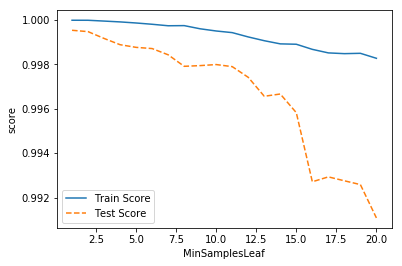

In [106]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesLeaf")
plt.legend()

In [107]:
train_score = []; test_score=[]

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = v_min_samples_split, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.999,0.997
1,6,0.999,0.997
2,8,0.999,0.997
3,10,0.999,0.997
4,12,0.999,0.997
5,14,0.999,0.997
6,16,0.999,0.997
7,18,0.999,0.997
8,20,0.999,0.997
9,22,0.999,0.997


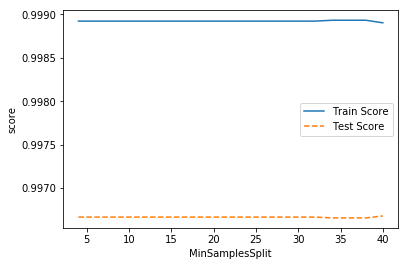

In [108]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesSplit")
plt.legend()

In [109]:
train_score = []; test_score=[]

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = 38, max_depth = v_max_depth, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.998,0.994
1,2,0.999,0.996
2,3,0.999,0.997
3,4,0.999,0.997
4,5,0.999,0.997
5,6,0.999,0.997
6,7,0.999,0.997
7,8,0.999,0.997
8,9,0.999,0.997
9,10,0.999,0.997


In [110]:
train_score = []; test_score=[]

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = 38, max_depth = 3, learning_rate = v_learning_rate, random_state = 2)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["Learning Late"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)

,Learning Late,TrainScore,TestScore
0,0.1,0.999,0.997
1,0.2,0.999,0.997
2,0.3,1.000,0.996
3,0.4,1.000,0.996
4,0.5,1.000,0.994
5,0.6,1.000,0.993
6,0.7,1.000,0.993
7,0.8,1.000,0.991
8,0.9,1.000,0.990


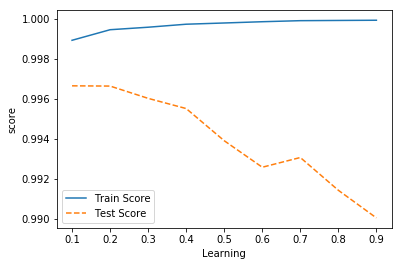

In [111]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Learning")
plt.legend()

In [112]:
gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 14, 
                               min_samples_split = 38, max_depth = 3,learning_rate = 0.2, random_state = 2)

gb_final.fit(df_train_x, df_train_y)
print("Score on trainig set\t: %.3f" % gb_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % gb_final.score(df_test_x, df_test_y))

gb_final

Score on trainig set	: 0.999
Score on test set	: 0.997


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=14,
             min_samples_split=38, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [113]:
estimator = GradientBoostingRegressor()

param_grid = {"criterion":["mse", "friedman_mse", "mae"], "max_features":["auto", "sqrt", "log2"],
             "max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("Best estimator model \n{}".format(grid_dt.best_estimator_))
print("\nBest parameter: \n{}".format(grid_dt.best_params_))

print("\nBest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model 
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=24,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Best parameter: 
{'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 24}

Best score: 
1.0
